# <center> Stromnetz Graz Smart Meter Analysis

In [1]:
# Imports for plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec
# Custom Modules
from SMIT.application import Application

## Setup

### Run with dummy data

In [4]:
app = Application(True)                 # Run appliction in dummy mode.
app.os_tools.sng_scrape_and_move()      # No webscraping, dummy csv file setup.

# Create dataframes with all data
df_day = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['day_meter'])
df_night = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['night_meter'])

# Print last entries of power consumption during the days
df_day.tail()

2023-09-12 14:06:02,159 :: WARNING  :: [rsahandling:51] :: No Rsa key pair found
2023-09-12 14:06:02,159 :: WARNING  :: [rsahandling:51] :: No Rsa key pair found
2023-09-12 14:06:02,159 :: WARNING  :: [rsahandling:51] :: No Rsa key pair found
2023-09-12 14:06:02,164 :: INFO     :: [rsahandling:56] :: Public key written
2023-09-12 14:06:02,164 :: INFO     :: [rsahandling:56] :: Public key written
2023-09-12 14:06:02,164 :: INFO     :: [rsahandling:56] :: Public key written
2023-09-12 14:06:02,176 :: INFO     :: [rsahandling:60] :: Private key written
2023-09-12 14:06:02,176 :: INFO     :: [rsahandling:60] :: Private key written
2023-09-12 14:06:02,176 :: INFO     :: [rsahandling:60] :: Private key written
2023-09-12 14:06:02,180 :: INFO     :: [application:81] :: Application with user "dummy user" instantiated
2023-09-12 14:06:02,180 :: INFO     :: [application:81] :: Application with user "dummy user" instantiated
2023-09-12 14:06:02,180 :: INFO     :: [application:81] :: Application w

,date,zaehlerstand,verbrauch
85,2023-03-27,2580.975,9433.0
86,2023-03-28,2583.444,2469.0
87,2023-03-29,2586.428,2984.0
88,2023-03-30,2591.248,4820.0
89,2023-03-31,2593.559,2311.0


### Run with live data
An account to Stromnetz Graz is needed  
Input dialog will be triggered

In [3]:
app = Application()                     # Create user from user_data file
app.os_tools.sng_scrape_and_move()      # Get/Update data from stromnetzgraz website

# Create dataframes with all data
df_day = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['day_meter'])
df_night = app.os_tools.create_dataframe(app.Folder['work_daysum'], app.Meter['night_meter'])

# Print last entries of power consumption during the days
df_day.tail()

2023-09-12 11:02:34,743 :: INFO     :: [application:81] :: Application with user "ch.koplenig@posteo.net" instantiated
2023-09-12 11:02:34,743 :: INFO     :: [application:81] :: Application with user "ch.koplenig@posteo.net" instantiated
2023-09-12 11:02:34,747 :: INFO     :: [scrapedata:113] :: Firefox headless mode activated
2023-09-12 11:02:34,747 :: INFO     :: [scrapedata:113] :: Firefox headless mode activated


KeyboardInterrupt: 

## Analysis
Shown data depends on previous run with either dummy data or live data

/tmp/ipykernel_19494/1900224827.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0, :2])


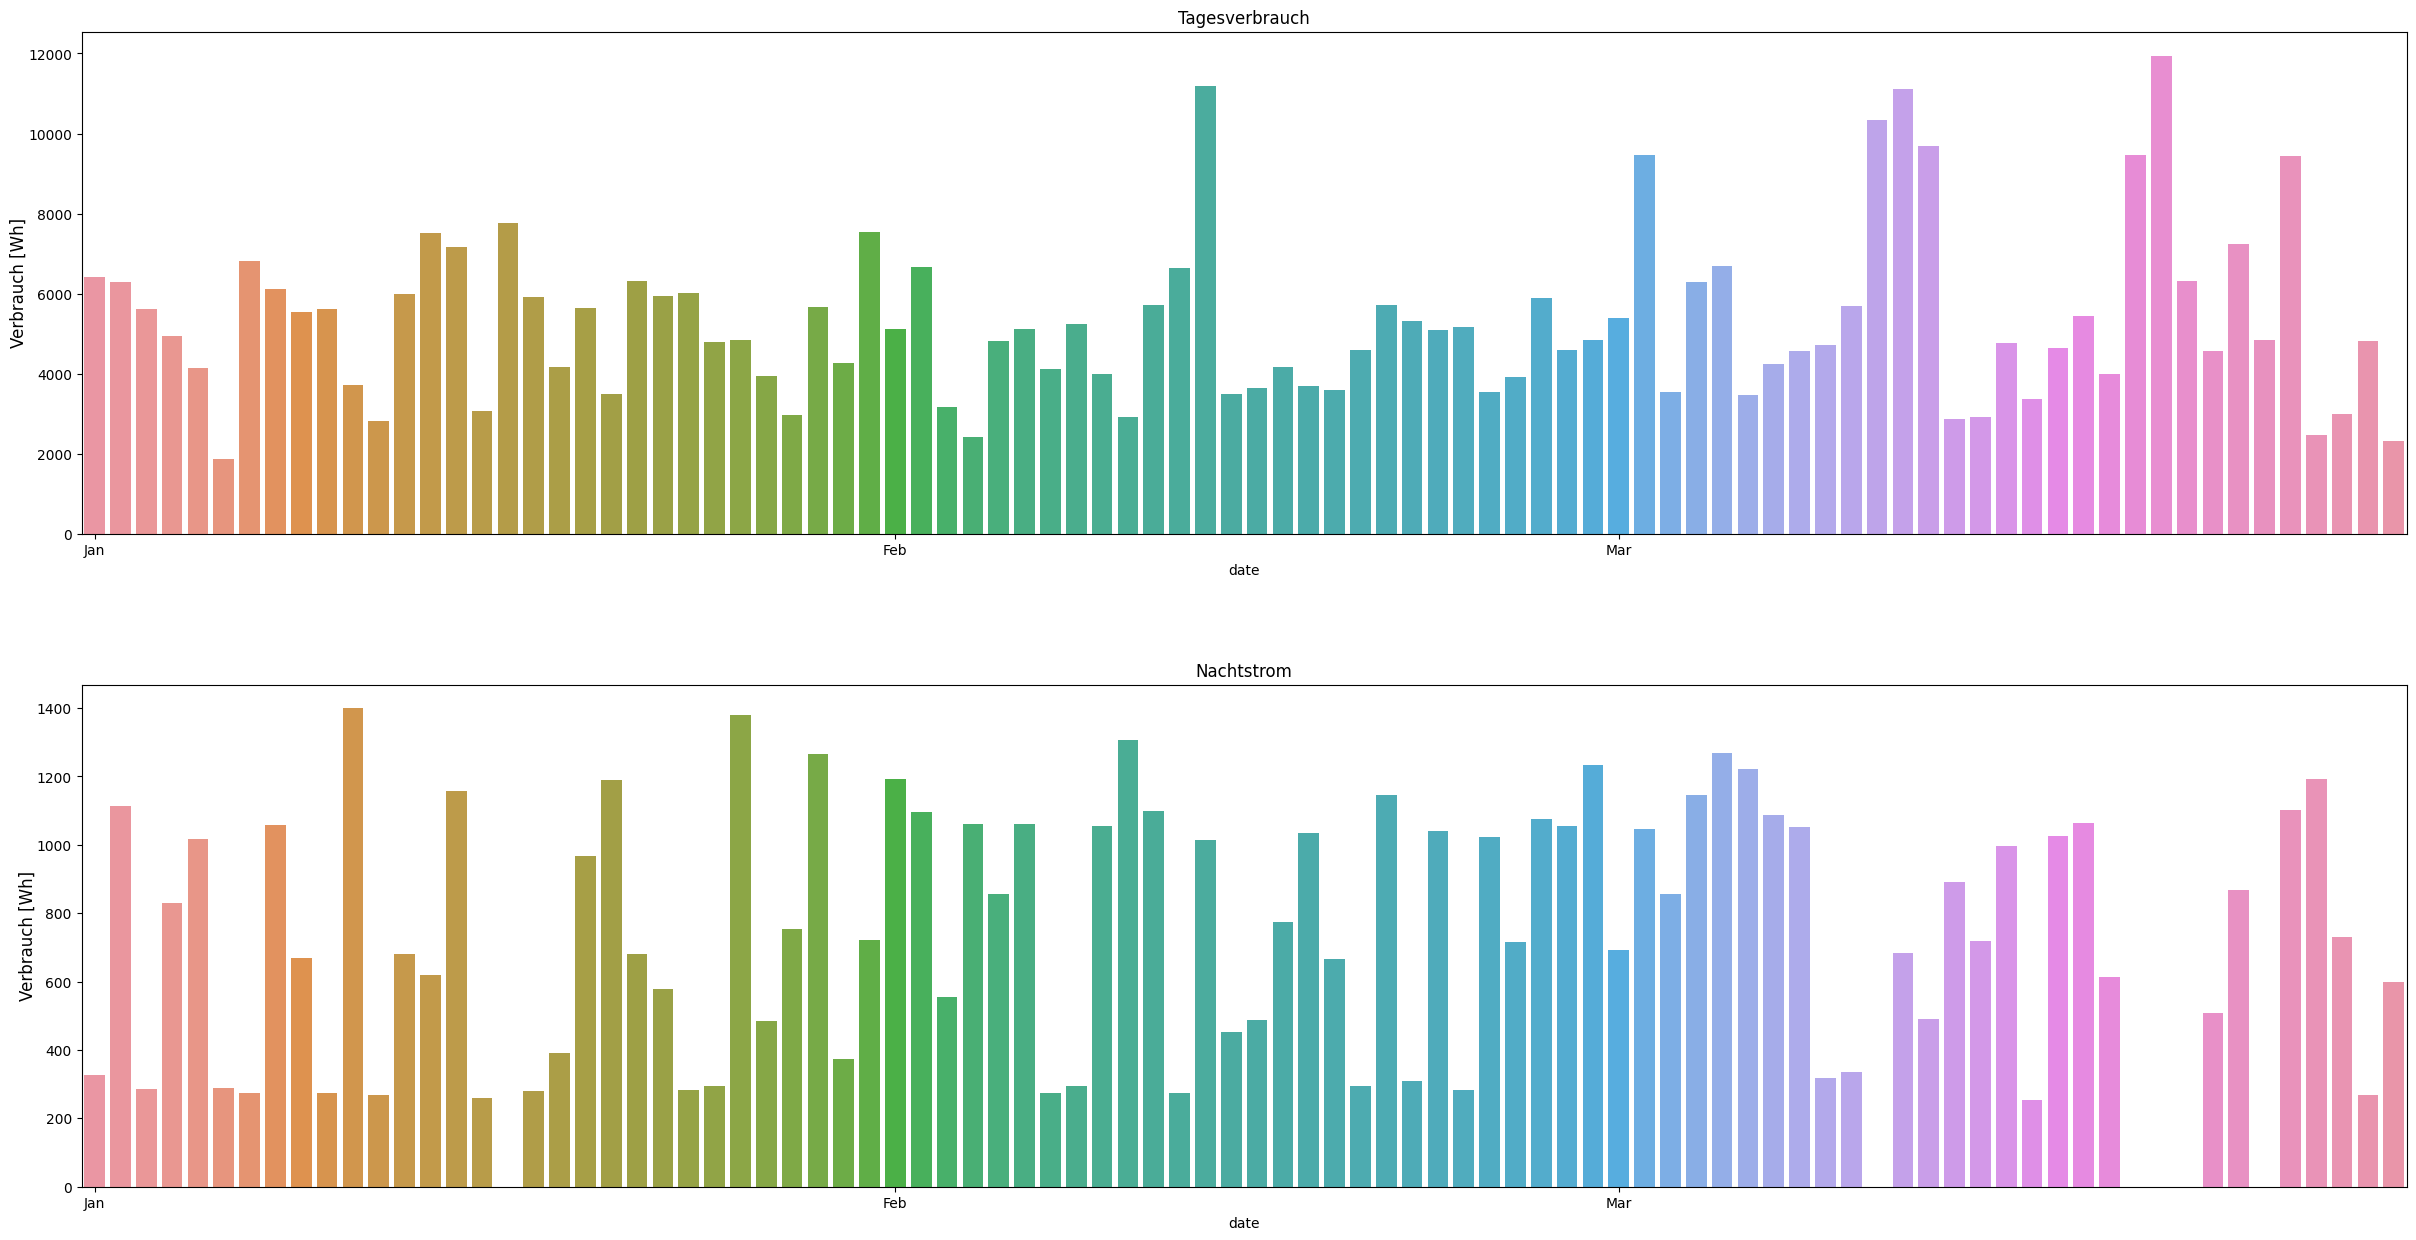

In [5]:
fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()